# 참조

In [ ]:
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from google.colab.patches import cv2_imshow
import urllib.request

drive.mount('/content/drive')
image_path = '/content/drive/My Drive/bit.jpg'

Mounted at /content/drive


# 반복적 임계값 설정 이진화 방식

## 반복적 임계값 설정 과정

1. 초기 임계값을 설정합니다. 일반적으로 이미지의 전체 평균값을 사용합니다.

2. 현재 임계값을 기준으로 이미지를 두 개의 클래스(객체와 배경)로 나눕니다.

3. 각 클래스의 평균 픽셀 값을 계산합니다.

4. 두 클래스 평균의 평균을 새로운 임계값으로 설정합니다.

5. 새로운 임계값을 사용하여 2~4단계를 반복합니다. 임계값이 더 이상 크게 변하지 않을 때까지 반복합니다.

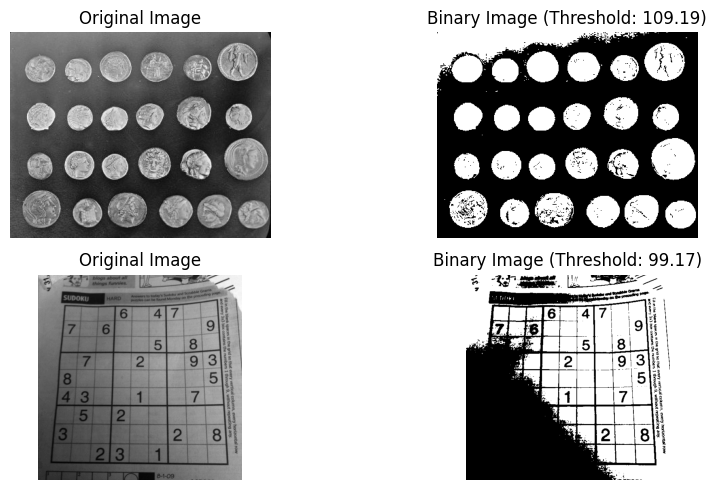

In [ ]:
def iterative_thresholding(image, initial_threshold=127, max_iterations=100, epsilon=1):
    # 초기 임계값 설정
    threshold = initial_threshold
    for _ in range(max_iterations):
        # 현재 임계값을 기준으로 이미지 이진화
        binary_image = (image > threshold).astype(np.uint8) * 255

        # 각 집단의 평균 계산
        # boolen 배열 인덱싱 사용
        mean1 = np.mean(image[image <= threshold]) if np.any(image <= threshold) else 0

        mean2 = np.mean(image[image > threshold]) if np.any(image > threshold) else 0

        # 새로운 임계값 계산
        new_threshold = (mean1 + mean2) / 2

        # 임계값 변화가 작으면 종료
        if abs(new_threshold - threshold) < epsilon:
            break

        threshold = new_threshold

    return binary_image, threshold

image = data.coins()

# 반복적 임계값 설정 방식으로 이진화
binary_image, final_threshold = iterative_thresholding(image)

# 원본 이미지와 이진화된 이미지 시각화
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title(f'Binary Image (Threshold: {final_threshold:.2f})')
plt.axis('off')

url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/sudoku.png'
resp = urllib.request.urlopen(url)
image2 = np.asarray(bytearray(resp.read()), dtype="uint8")
image2 = cv2.imdecode(image2, cv2.IMREAD_GRAYSCALE)

# 반복적 임계값 설정 방식으로 이진화
binary_image2, final_threshold2 = iterative_thresholding(image2)

# 원본 이미지와 이진화된 이미지 시각화
plt.subplot(2, 2, 3)
plt.imshow(image2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_image2, cmap='gray')
plt.title(f'Binary Image (Threshold: {final_threshold2:.2f})')
plt.axis('off')

plt.tight_layout()
plt.show()

### 고급 인덱싱

| 위의 image[image <= threshold] 코드에 대한 자세한 설명을 추가하겠습니다.

**고급 인덱싱 (Advanced Indexing)**은 NumPy에서 제공하는 기능으로, 배열을 보다 정교하게 접근하고 조작할 수 있는 방법입니다. 고급 인덱싱을 사용하면 배열의 특정 요소, 슬라이스, 또는 하위 집합을 선택할 때 더 유연한 접근이 가능합니다.


1. 불리언 인덱싱

  - 불리언 인덱싱은 배열의 각 요소가 특정 조건을 만족하는지 여부를 나타내는 불리언 배열을 사용하여 배열의 하위 집합을 선택하는 방법입니다.

  - 조건 배열은 원래 배열과 동일한 형태를 가지며, 각 요소가 조건을 만족하면 True, 그렇지 않으면 False입니다.

  - 이 조건 배열을 인덱스로 사용하여 원래 배열에서 조건을 만족하는 요소들만 추출할 수 있습니다.

2. 정수 인덱싱

  - 정수 인덱싱은 배열의 인덱스 위치를 직접 지정하여 하위 배열을 선택하는 방법입니다. 정수 배열을 사용하여 배열의 특정 위치에 있는 요소를 선택할 수 있습니다.

  - 정수 배열을 사용하여 원래 배열의 특정 위치에 있는 요소를 선택합니다.

  - 정수 배열은 중복된 인덱스를 포함할 수 있으며, 이 경우 중복된 인덱스에 해당하는 값이 결과 배열에 반복됩니다.

**예제**

In [ ]:
import numpy as np

# 예제 배열
array = np.array([1, 2, 3, 4, 5])

# 불리언 배열 생성
bool_array = array % 2 == 0  # array([False,  True, False,  True, False])

# 불리언 인덱싱
even_numbers = array[bool_array]  # array([2, 4])

# 정수 인덱스 배열 생성
indices = np.array([0, 1, 2, 3, 4])
selected_values = array[indices[bool_array]]  # array([2, 4])

print("Even numbers:", even_numbers)
print("Selected values:", selected_values)


#Otsu 이진화 방식


##Otsu  이진화 방식의 개요

  * Otsu의 방법은 이미지의 히스토그램을 분석하여 최적의 임계값을 찾는 방식이다.
  
  * 이 방법의 핵심은 이미지를 두 개의 영역(객체와 배경)으로 나누고, 두 영역의 간의 분산을 최대화하는 임계값을 찾는 것이다.

## 수식적 설명

1. 히스토그램 계산

  * 이미지의 각 픽셀 값이 나타나는 빈도수를 계산하여 히스토그램을 생성.
  
  * 히스토그램에서 각 픽셀 값 i에 대한 빈도는 h(i)로 표현.

2. 정규화된 히스토그램

  * 전체 픽셀 수를 N이라고 할 때, 픽셀 값 i의 정규화된 빈도는 다음과 같이 계산한다.

  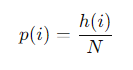

3. 누적 분포 함수
  * 누적 분포 함수 w(t)는 임계값 t까지의 픽셀 확률의 합으로 정의됩니다.

  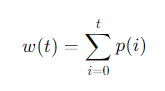

4. 영역 평균

    * 배경 영역 평균은 임계값 t까지의 픽셀 값의 평균입니다.

  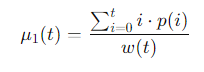

  * 객체 영역 평균은 `t + 1`부터 `최댓값`까지의 픽셀 값의 평균입니다.
  
 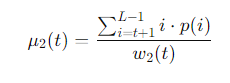
 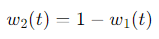

5. 클래스 간 분산

  * 클래스 간 분산은 두 클래스 평균 간의 차이를 제곱한 후 두 클래스의 비율로 가중치를 조절

  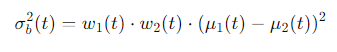

---

  ### **임계값을 `클래스 간 분산을 최대화 하는 값`으로 하는 것이 효과적인 이유**

  * 영역 간 분산이 클수록 두 영역 간의 평균 차이가 커져, 영역 간의 경계가 명확해집니다.

  * 영역 간 분산을 최대화하면, 각 영역 내부의 분산이 상대적으로 작아지는 경향이 있습니다. 이는 객체와 배경이 잘 구분되기 때문입니다.

  * 영역 간 분산은 두 영역의 평균 차이의 제곱을 포함합니다. 이 제곱은 클래스 간 평균 차이를 강조합니다.

  * 두 영역 비율의 곱: 각 클래스의 비율은 클래스 간 분산의 가중치를 조절합니다. 두 클래스의 비율이 균형을 이루는 경우, 클래스 간 평균 차이를 효과적으로 활용할 수 있습니다.






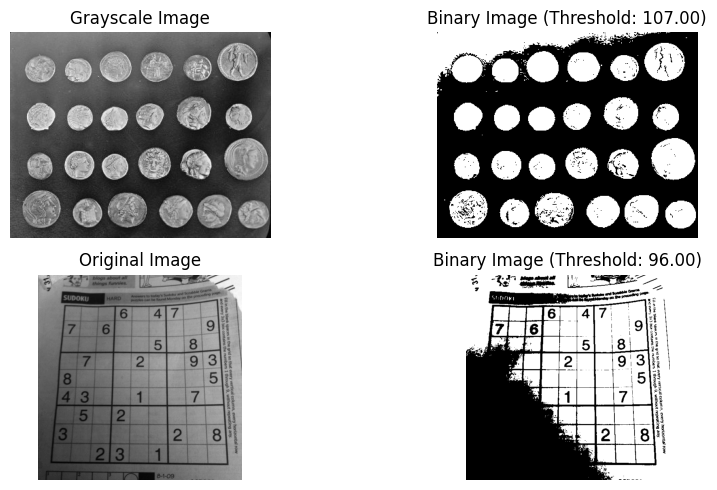

In [ ]:
# 예제 이미지 로드 (skimage의 camera 이미지를 사용)
image = data.coins()
# 이미지를 이진화 (threshold를 이용하여 이진화)
ret, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)

# 원본 이미지와 이진화된 이미지 시각화
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title(f'Binary Image (Threshold: {ret:.2f})')
plt.axis('off')

url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/sudoku.png'
resp = urllib.request.urlopen(url)
image2 = np.asarray(bytearray(resp.read()), dtype="uint8")
image2 = cv2.imdecode(image2, cv2.IMREAD_GRAYSCALE)

# 반복적 임계값 설정 방식으로 이진화
ret2, binary_image2 = cv2.threshold(image2, 0, 255, cv2.THRESH_OTSU)

# 원본 이미지와 이진화된 이미지 시각화
plt.subplot(2, 2, 3)
plt.imshow(image2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_image2, cmap='gray')
plt.title(f'Binary Image (Threshold: {ret2:.2f})')
plt.axis('off')

plt.tight_layout()
plt.show()
plt.show()